In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
##LEVEL1: Data Understanding and EDA

In [ ]:
from google.colab import files
files.upload()


Saving customer_churn.csv to customer_churn.csv


{'customer_churn.csv': b'customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn\r\n7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No\r\n5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.5,No\r\n3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes\r\n7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.3,1840.75,No\r\n9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.7,151.65,Yes\r\n9305-CDSKC,8,Fiber optic,No,No,Yes,No,Month-to-month,Electronic check,99.65,820.5,Yes\r\n1452-KIOVK,22,Fiber optic,No,Yes,No,No,Month-to-month,Credit card (automatic),89.1,1949.4,No\r\n6713-OKOMC,10,DSL,Yes,No,No,No,Month-to-month,Mailed check,29.75,301.9,No\r\n7892-POOKP,28,Fiber optic,No,No,Yes,Yes,Month-to-month,Electronic check,104.8,3046.05,Yes\r\n6388-TABGU,62,DSL,Yes,Yes,No,No,One year,Bank transfer (automa

In [ ]:
df = pd.read_csv("customer_churn.csv")
df.head()


,customerID,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,DSL,No,Yes,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,34,DSL,Yes,No,Yes,No,One year,Mailed check,56.95,1889.5,No
2,3668-QPYBK,2,DSL,Yes,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,45,DSL,Yes,No,Yes,Yes,One year,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,2,Fiber optic,No,No,No,No,Month-to-month,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape


(7043, 12)

In [ ]:
df.columns


Index(['customerID', 'tenure', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'Contract',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   tenure            7043 non-null   int64  
 2   InternetService   7043 non-null   object 
 3   OnlineSecurity    7043 non-null   object 
 4   OnlineBackup      7043 non-null   object 
 5   DeviceProtection  7043 non-null   object 
 6   TechSupport       7043 non-null   object 
 7   Contract          7043 non-null   object 
 8   PaymentMethod     7043 non-null   object 
 9   MonthlyCharges    7043 non-null   float64
 10  TotalCharges      7043 non-null   object 
 11  Churn             7043 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 660.4+ KB


In [ ]:
df.isnull().sum()


,0
customerID,0
tenure,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0
DeviceProtection,0
TechSupport,0
Contract,0
PaymentMethod,0
MonthlyCharges,0


In [ ]:
df['Churn'].value_counts()


,count
Churn,
No,5174
Yes,1869


In [ ]:
df.drop(columns=['customerID'], inplace=True)


In [ ]:
df.describe()


,tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


from matplotlib import pyplot as plt
_df_0['tenure'].plot(kind='hist', bins=20, title='tenure')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MonthlyCharges'].plot(kind='hist', bins=20, title='MonthlyCharges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='tenure', y='MonthlyCharges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['tenure'].plot(kind='line', figsize=(8, 4), title='tenure')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['MonthlyCharges'].plot(kind='line', figsize=(8, 4), title='MonthlyCharges')
plt.gca().spines[['top', 'right']].set_visible(False)

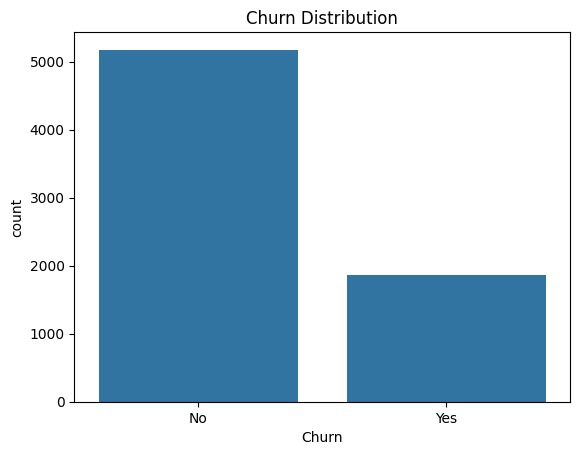

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Churn', data=df)
plt.title("Churn Distribution")
plt.show()


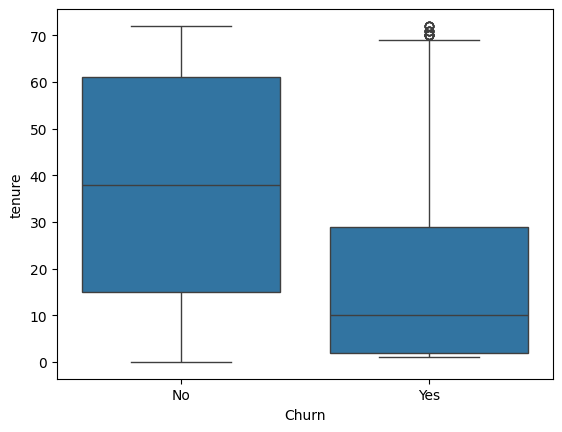

In [ ]:
sns.boxplot(x='Churn', y='tenure', data=df)
plt.show()


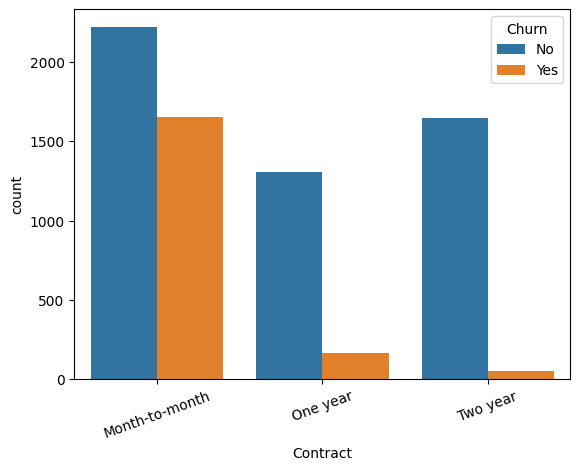

In [ ]:
sns.countplot(x='Contract', hue='Churn', data=df)
plt.xticks(rotation=20)
plt.show()


In [ ]:
##LEVEL2: Classical Machine Learning

In [ ]:
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True)


In [ ]:
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = lr.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1:", f1_score(y_test, y_pred))


Accuracy: 0.8062455642299503
Precision: 0.6572327044025157
Recall: 0.5603217158176944
F1: 0.6049204052098408


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1:", f1_score(y_test, y_pred_rf))


Accuracy: 0.8026969481902059
Precision: 0.6690391459074733
Recall: 0.5040214477211796
F1: 0.5749235474006116


In [ ]:
comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf)
    ]
})

comparison


,Model,Accuracy,F1 Score
0,Logistic Regression,0.806246,0.604920
1,Random Forest,0.802697,0.574924


In [ ]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

feature_importance.head(10)


,Feature,Coefficient
1626,TotalCharges_20.2,1.464660
1632,TotalCharges_20.5,1.285335
1502,TotalCharges_19.6,1.219718
1624,TotalCharges_20.1,1.217418
1509,TotalCharges_19.95,1.133928
2504,TotalCharges_288.05,1.060172
5743,TotalCharges_740.3,1.046561
3832,TotalCharges_45.3,1.017566
1640,TotalCharges_20.9,0.973844
212,TotalCharges_1099.6,0.952291


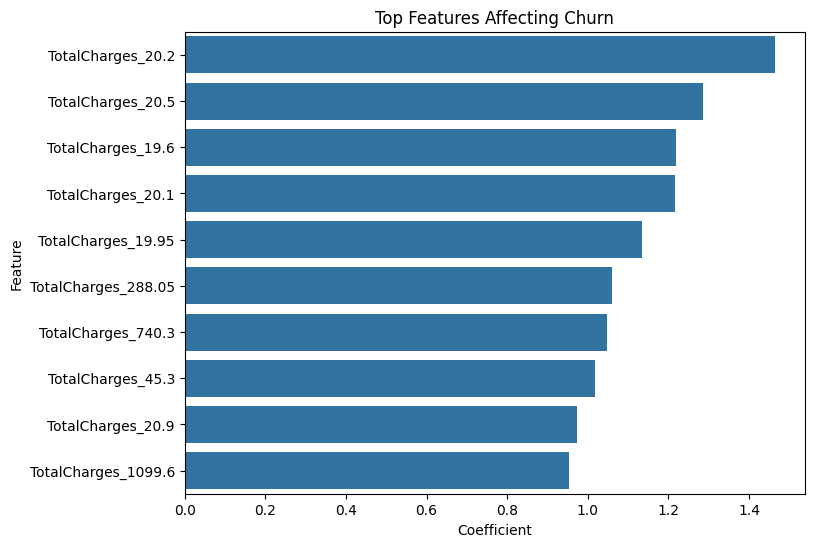

In [ ]:
plt.figure(figsize=(8,6))
sns.barplot(
    x='Coefficient',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top Features Affecting Churn")
plt.show()


In [ ]:
##LEVEL3: Neural Netwworks and Advanced Modelling

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [ ]:
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)


Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - accuracy: 0.6968 - loss: 0.5990 - val_accuracy: 0.7622 - val_loss: 0.4796
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9080 - loss: 0.2315 - val_accuracy: 0.7551 - val_loss: 0.5141
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.9831 - loss: 0.0616 - val_accuracy: 0.7418 - val_loss: 0.5687
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9845 - loss: 0.0375 - val_accuracy: 0.7169 - val_loss: 0.6433
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9885 - loss: 0.0269 - val_accuracy: 0.7169 - val_loss: 0.6661
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.9877 - loss: 0.0278 - val_accuracy: 0.7267 - val_loss: 0.6692
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9860 - loss: 0.0245 - val_accuracy: 0.7152 - val_loss: 0.7123
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9882 - loss: 0.0222 - val_accur

In [ ]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)

print("Neural Network Accuracy:", accuracy)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7096 - loss: 0.9837
Neural Network Accuracy: 0.7083037495613098


In [ ]:
y_pred_nn = (model.predict(X_test_scaled) > 0.5).astype(int)


45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [ ]:
print("NN Precision:", precision_score(y_test, y_pred_nn))
print("NN Recall:", recall_score(y_test, y_pred_nn))
print("NN F1:", f1_score(y_test, y_pred_nn))


NN Precision: 0.4708588957055215
NN Recall: 0.8230563002680965
NN F1: 0.5990243902439024


In [ ]:
final_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Neural Network'],
    'Accuracy': [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_nn)
    ],
    'F1 Score': [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_nn)
    ]
})

final_comparison


,Model,Accuracy,F1 Score
0,Logistic Regression,0.806246,0.604920
1,Random Forest,0.802697,0.574924
2,Neural Network,0.708304,0.599024


from matplotlib import pyplot as plt
final_comparison['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
final_comparison['F1 Score'].plot(kind='hist', bins=20, title='F1 Score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
final_comparison.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
final_comparison.plot(kind='scatter', x='Accuracy', y='F1 Score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
final_comparison['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
final_comparison['F1 Score'].plot(kind='line', figsize=(8, 4), title='F1 Score')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_comparison, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(final_comparison['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(final_comparison, x='F1 Score', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)